In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read boston housing dataset
dataset=pd.read_csv("/content/drive/MyDrive/housing dataset/HousingData.csv")

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
dataset.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [5]:
# identifying the unique number of values in the dataset
dataset.nunique()

,0
CRIM,484
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,348
DIS,412
RAD,9
TAX,66


In [6]:
dataset.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
dataset.describe()
# shows statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
corr=dataset.corr()
corr.shape

(14, 14)

<Axes: >

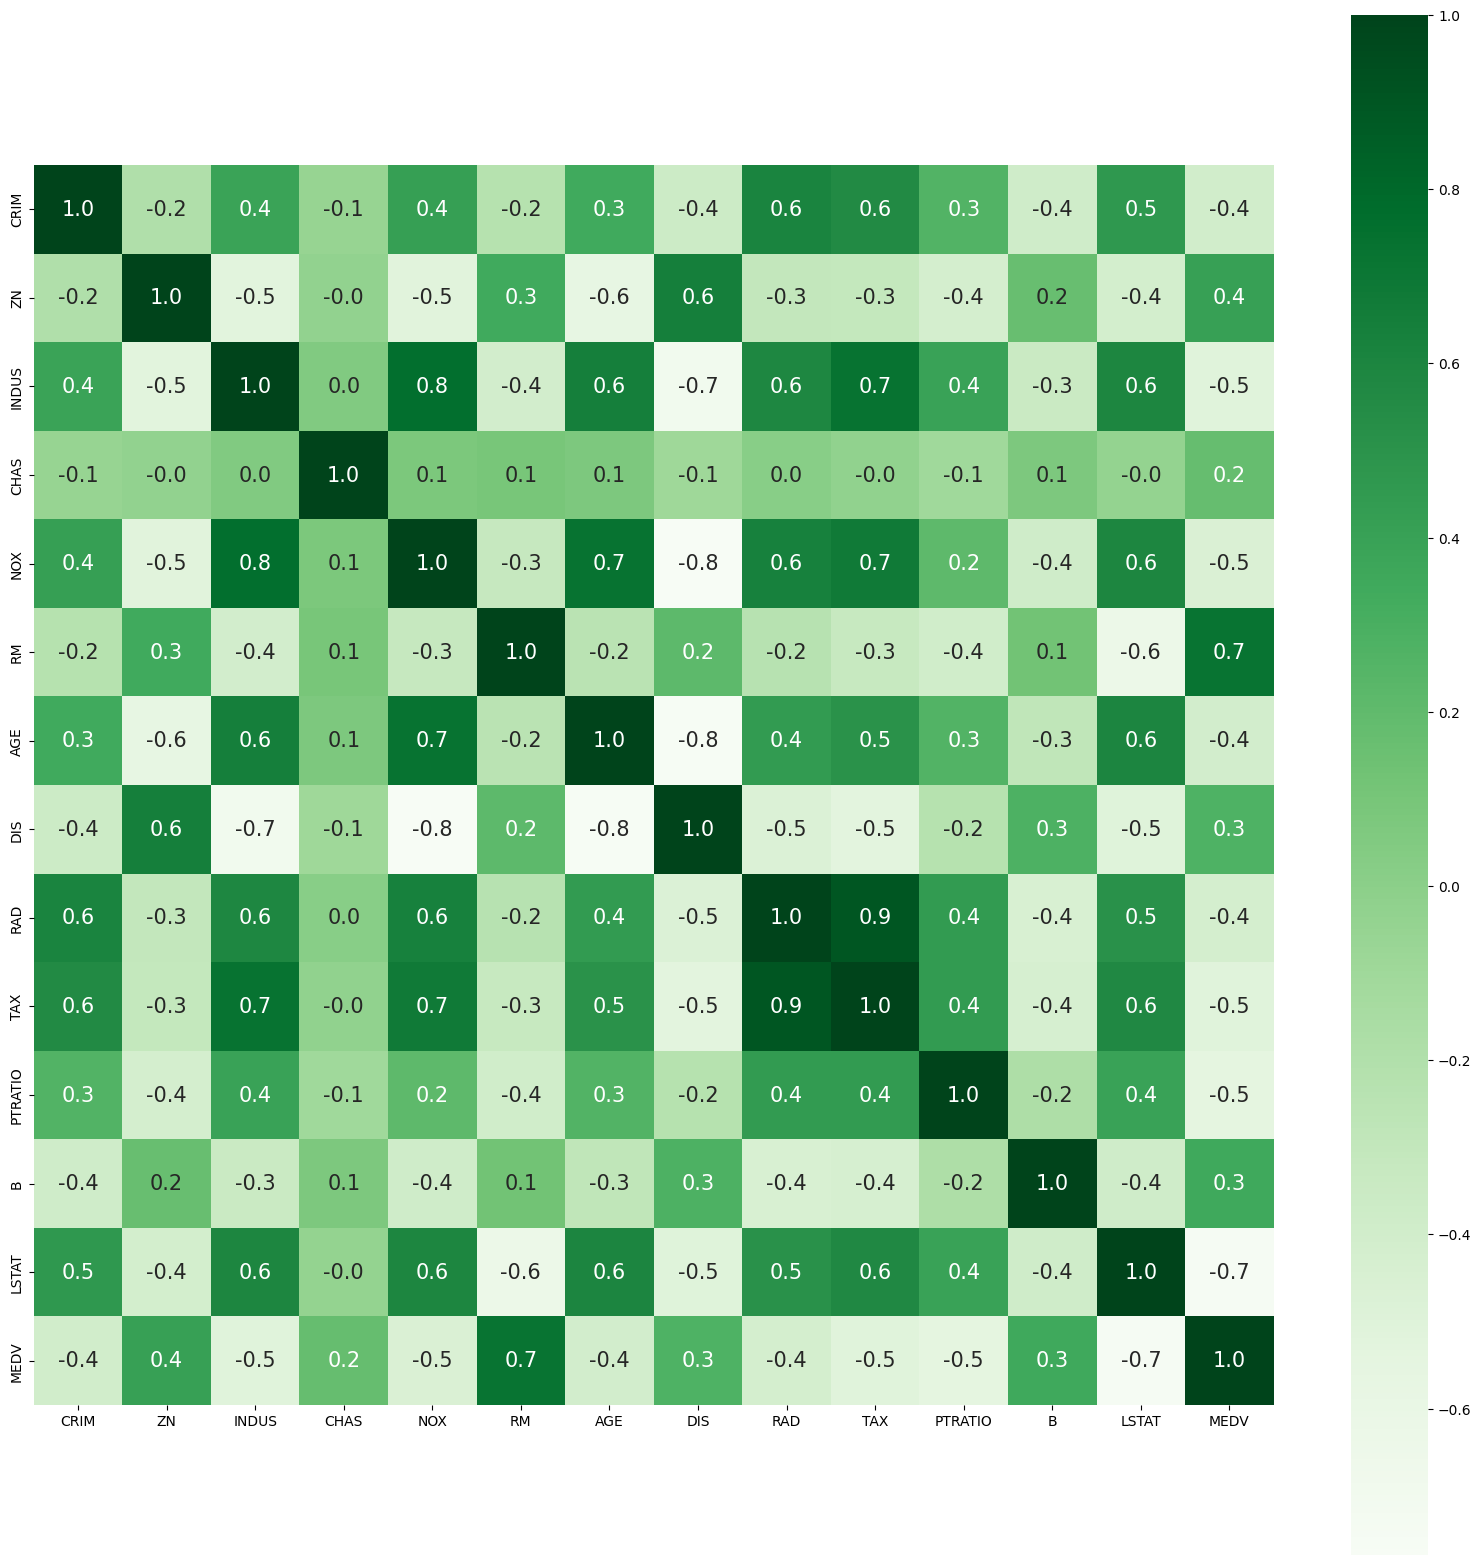

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [12]:
x=dataset[['RM']]
y=dataset[['MEDV']]
#

In [13]:
x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
5,6.430
...,...
499,5.569
500,6.027
502,6.120
503,6.976


In [14]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
lm.intercept_

array([-37.44048762])

In [18]:
coeffcients = pd.DataFrame([x_train.columns,lm.coef_])
coeffcients = coeffcients.rename(columns={0:'Features',1:'Coefficients'})
coeffcients

,Features
0,RM
1,[9.532492359180607]


In [19]:
y_pred = lm.predict(x_train)

In [20]:
from sklearn import metrics

In [21]:
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MAE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 4.000756523483964
MAE: 33.07223956009026
RMSE: 5.750846855906551


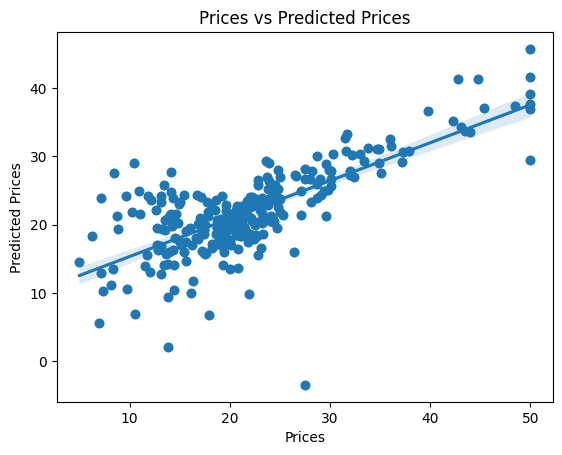

In [22]:
plt.scatter(y_train,y_pred)
sns.regplot(x=y_train, y=y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

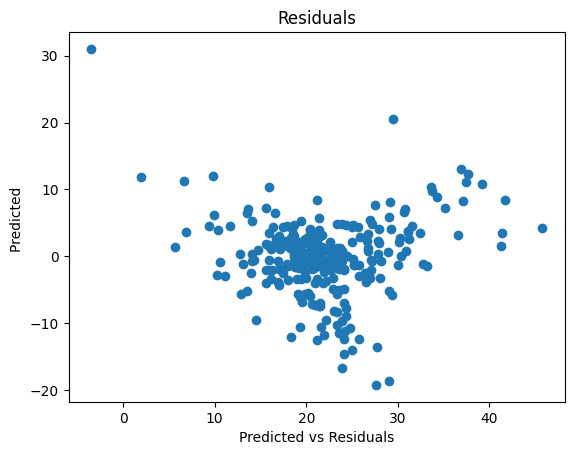

In [23]:
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel("Predicted vs Residuals")
plt.ylabel("Predicted ")
plt.title("Residuals")
plt.show()

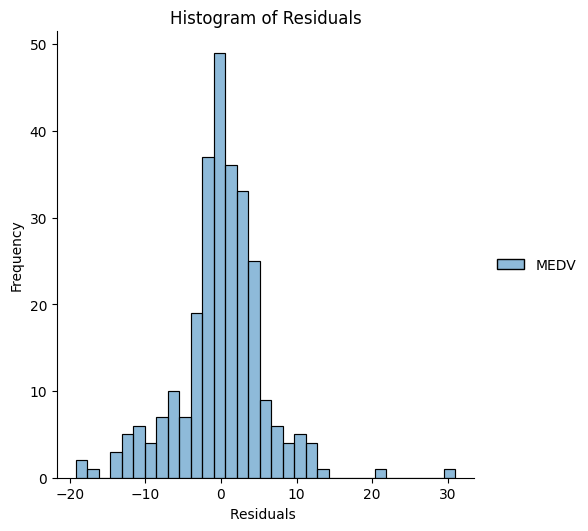

In [24]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals ")
plt.ylabel("Frequency")
plt.show()

In [25]:
y_test_pred = lm.predict(x_test)

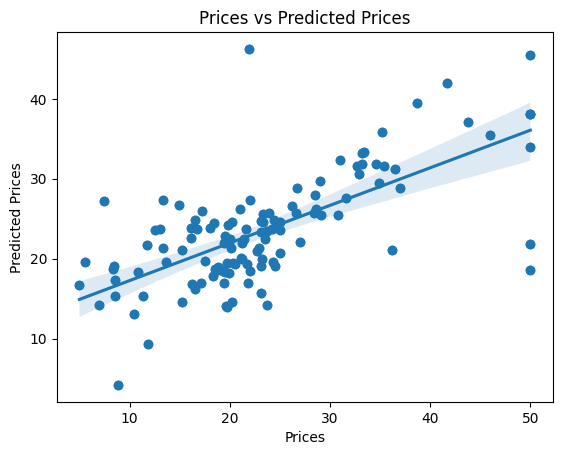

In [26]:
plt.scatter(y_test,y_test_pred)
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [27]:
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 4.972140970836248
MAE: 54.97103443822725
RMSE: 7.414245372135134


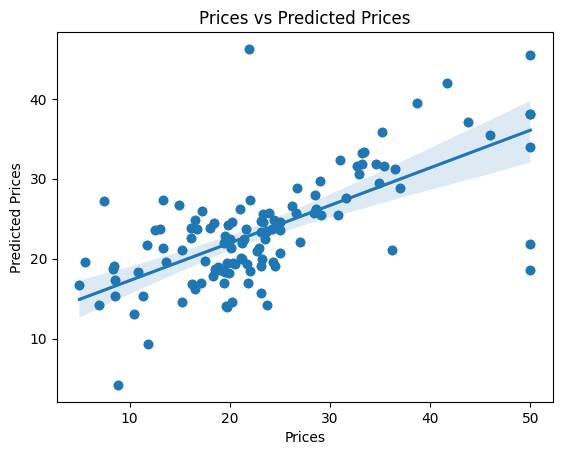

In [28]:
plt.scatter(y_test,y_test_pred)
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

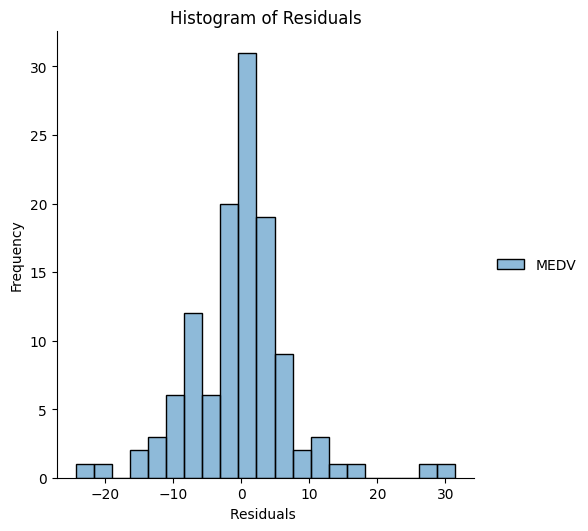

In [29]:
sns.displot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals ")
plt.ylabel("Frequency")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
"Creates a polynomial regression model for the given degree"
poly_feature = PolynomialFeatures(degree=1)

x_train_poly = poly_feature.fit_transform(x_train)

poly_model = LinearRegression()

poly_model.fit(x_train_poly, y_train)

y_train_predicted = poly_model.predict(x_train_poly)

y_test_predicted = poly_model.predict(poly_feature.fit_transform(x_test))

<ipython-input-32-7684c569bbe9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_residual, bins=15)
<ipython-input-32-7684c569bbe9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_residual, bins=15)


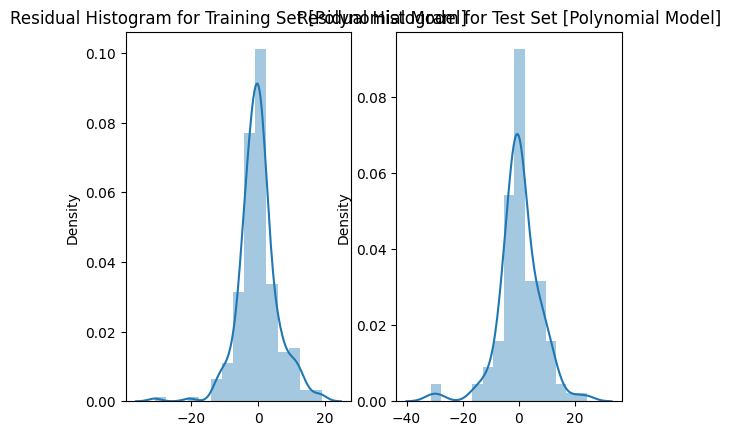

In [32]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

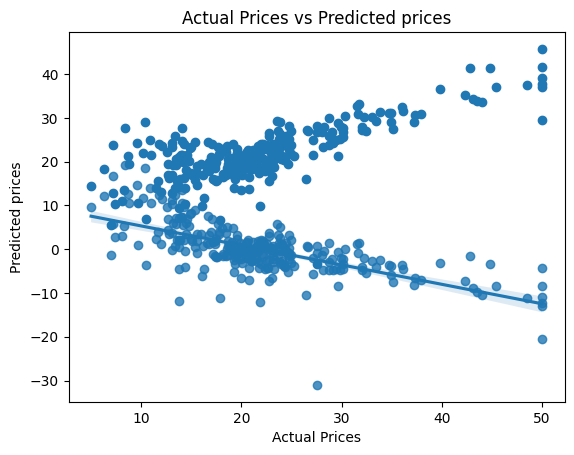

In [33]:
plt.scatter(y_train, y_train_predicted)
sns.regplot(x=y_train, y=y_train_residual)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

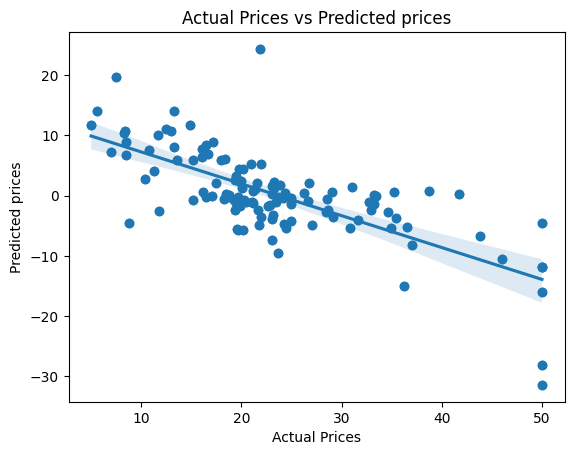

In [34]:
plt.scatter(y_test,y_test_residual)
sns.regplot(x=y_test, y=y_test_residual)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [35]:
print('MAE:',metrics.mean_absolute_error(y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))

MAE: 4.000756523483963
MSE: 33.07223956009027
RMSE: 5.750846855906551


In [36]:
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

MAE: 4.9721409708362465
MSE: 54.971034438227264
RMSE: 7.4142453721351345


In [37]:
# Splitting target variable and implement variables
x = dataset.drop(['MEDV'], axis =1)
y = dataset['MEDV']

In [38]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [39]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


In [40]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0
